In [1]:
#Import necessary libraries.
import pandas as pd

In [2]:
df=pd.read_csv("C:\\Users\\abhis\\Downloads\\train (1).csv")

C:\Users\abhis\AppData\Local\Temp\ipykernel_5648\974841448.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("C:\\Users\\abhis\\Downloads\\train (1).csv")


In [3]:
#Display a sample of five rows of the data frame.
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [4]:
 #Check the shape of the data (number of rows and columns). Check the general
#information about the dataframe using the .info() method.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [5]:
df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [6]:
df.shape
#there are around 10lakhs records and 9 columns 

(1017209, 9)

In [7]:
#Check if there are any duplicate rows.
duplicate_records=df[df.duplicated()]
print("duplicate records are ")
duplicate_records

duplicate records are 


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday


there are no duplicate records 

In [8]:
pd.set_option('display.max_rows', 1000000)

In [9]:
df["StateHoliday"].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [10]:
holiday_map={'0':0,'a':1,'b':2,'c':3,0:0}
df['StateHoliday']=df['StateHoliday'].map(holiday_map)
df['StateHoliday'].unique()

array([0, 1, 2, 3], dtype=int64)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  int64 
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(8), object(1)
memory usage: 69.8+ MB


In [12]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


7. Create a new feature 'recency' from the 'Date' column
where,
Recency = number of days between the end date and the current date

Also drop the columns 'Date' and 'Store'

In [13]:
df['Date'] = pd.to_datetime(df['Date'])
print(df['Date'].max())

2015-07-31 00:00:00


In [14]:
end_date = df['Date'].max()

In [15]:
df['Recency'] = df['Date'].apply(lambda x:(end_date-x).days)

In [16]:
df['Recency'].sample(5)

204375    183
126241    113
438459    422
772912    722
112010    100
Name: Recency, dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 10 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  int64         
 8   SchoolHoliday  1017209 non-null  int64         
 9   Recency        1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(9)
memory usage: 77.6 MB


In [18]:
df.drop(labels=['Store','Date'],axis=1,inplace=True)

In [19]:
df.sample(5)

,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Recency
14131,7,0,0,0,0,0,0,12
487230,1,0,0,0,0,2,1,466
187070,6,7726,548,1,0,0,0,167
63543,5,6822,522,1,1,0,1,56
129799,1,0,0,0,0,2,0,116


8. Check the basic statistics of the data-frame using describe() method.

In [20]:
description=df.describe().transpose()
print(description)

                   count         mean          std  min     25%     50%  \
DayOfWeek      1017209.0     3.998341     1.997391  1.0     2.0     4.0   
Sales          1017209.0  5773.818972  3849.926175  0.0  3727.0  5744.0   
Customers      1017209.0   633.145946   464.411734  0.0   405.0   609.0   
Open           1017209.0     0.830107     0.375539  0.0     1.0     1.0   
Promo          1017209.0     0.381515     0.485759  0.0     0.0     0.0   
StateHoliday   1017209.0     0.045163     0.283656  0.0     0.0     0.0   
SchoolHoliday  1017209.0     0.178647     0.383056  0.0     0.0     0.0   
Recency        1017209.0   475.937004   274.454107  0.0   231.0   485.0   

                  75%      max  
DayOfWeek         6.0      7.0  
Sales          7856.0  41551.0  
Customers       837.0   7388.0  
Open              1.0      1.0  
Promo             1.0      1.0  
StateHoliday      0.0      3.0  
SchoolHoliday     0.0      1.0  
Recency         713.0    941.0  


In [21]:
df.head()

,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Recency
0,5,5263,555,1,1,0,1,0
1,5,6064,625,1,1,0,1,0
2,5,8314,821,1,1,0,1,0
3,5,13995,1498,1,1,0,1,0
4,5,4822,559,1,1,0,1,0


In [22]:
import seaborn as sns 


C:\Users\abhis\AppData\Local\Temp\ipykernel_5648\4256165467.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Sales'])


<Axes: xlabel='Sales', ylabel='Density'>

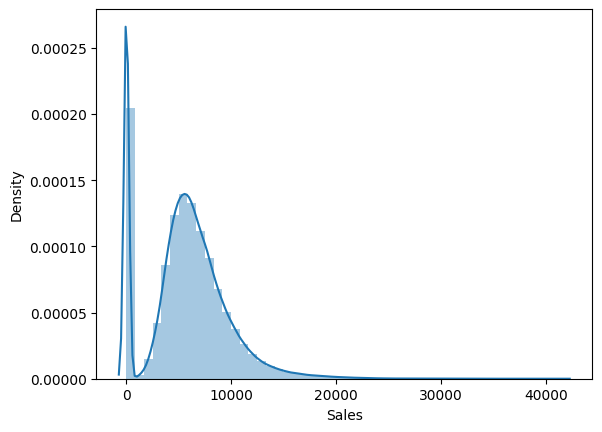

In [23]:
sns.distplot(df['Sales'])

Model Building and Evaluation


1. Store the target column (i.e.Sales) in the y variable and the rest of the columns in
the X variable.


In [24]:
Y=df['Sales']
x=df.drop(['Sales'],axis=1)

2. Split the dataset into two parts (i.e. 70% train and 30% test) using
random_state=42.


In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_train,x_test,Y_train,Y_test=train_test_split(x,Y,test_size=0.3,random_state=42)

3. Train a Decision tree model

In [27]:
from sklearn.tree import DecisionTreeRegressor

In [28]:
dt_model=DecisionTreeRegressor()

In [29]:
dt_model.fit(x_train,Y_train)

DecisionTreeRegressor()

In [30]:
y_pred=dt_model.predict(x_test)

In [31]:
dt_model.score(x_test,Y_test)

0.7834107458760937

In [32]:
from sklearn.metrics import r2_score

In [33]:
r2_score(Y_test,y_pred)

0.7834107458760937

It can be observed that model is overfitting 

4. Train multiple Decision tree models with different values for max_depth and max_features 

In [34]:
max_depth=[3,5,7]
max_features=[3,5,7]
for i in max_depth:
    for j in max_features:
        dt_model=DecisionTreeRegressor(max_depth=i,max_features=j)
        dt_model.fit(x_train,Y_train)
        y_predict=dt_model.predict(x_test)
        a=dt_model.score(x_test,Y_test)
        print(f"For max_depth of {i} and max_features of {j} the accuracy of the model is {a}")
        print("_"*20)
        
    


For max_depth of 3 and max_features of 3 the accuracy of the model is 0.7756250824428539
____________________
For max_depth of 3 and max_features of 5 the accuracy of the model is 0.8086235697597872
____________________
For max_depth of 3 and max_features of 7 the accuracy of the model is 0.8102113829768038
____________________
For max_depth of 5 and max_features of 3 the accuracy of the model is 0.6826360457477114
____________________
For max_depth of 5 and max_features of 5 the accuracy of the model is 0.8525965896879137
____________________
For max_depth of 5 and max_features of 7 the accuracy of the model is 0.8569079367775025
____________________
For max_depth of 7 and max_features of 3 the accuracy of the model is 0.8284796991277272
____________________
For max_depth of 7 and max_features of 5 the accuracy of the model is 0.8641426995143171
____________________
For max_depth of 7 and max_features of 7 the accuracy of the model is 0.8704582329713084
____________________


WE CAN OBSERVE THAT THE DECISION TREE MODEL PERFORMING WELL WHEN BOTH MAX_DEPTH AND MAX_FEATURE ARE 7 WITH ACCURACY OF 87%

 Check the importance of features as per the Decision Tree


In [35]:
pd.Series(dt_model.feature_importances_, index=x_train.columns)

DayOfWeek        0.008160
Customers        0.964078
Open             0.000000
Promo            0.027631
StateHoliday     0.000000
SchoolHoliday    0.000000
Recency          0.000130
dtype: float64

6. Train a Random Forest model

In [36]:
from sklearn.ensemble import RandomForestRegressor

In [37]:
rf_model=RandomForestRegressor()


In [39]:
rf_model.fit(x_train,Y_train)


RandomForestRegressor()

In [41]:
rf_y_predict=rf_model.predict(x_test)


In [ ]:
rf_model.score(x_test,Y_test)